In [1]:
import pickle as pk
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.append('/Users/yoavfreund/projects/shapeology/shapeology_code/scripts/')
#sys.path

In [3]:
D=pk.load(open('../../data/tiles/tiles_743_extracted.pkl','rb'))

FileNotFoundError: [Errno 2] No such file or directory: '../../data/tiles/tiles_743_extracted.pkl'

In [4]:
D[0].keys()

NameError: name 'D' is not defined

In [5]:
from lib.shape_utils import plot_patches,pack_pics

ModuleNotFoundError: No module named 'lib.shape_utils'

In [6]:
patches=[c['normalized_patch'] for c in D]
#conf=np.array([c['confidence'] for c in D])
norm_confidence=np.array([(c['center circle mean']-c['ring mean']) for c in D])
mean=np.array([c['global mean']  for c in D])

NameError: name 'D' is not defined

In [7]:
fig=figure(figsize=[15,15])
plot_patches(fig,pack_pics(patches),h=10,w=10,_titles=['%3.2f'%norm_confidence[i] for i in range(mean.shape[0])])

NameError: name 'plot_patches' is not defined

<Figure size 1080x1080 with 0 Axes>

In [8]:
i=-5
R=D[i]
for key in ['rotation', 'rotation_confidence', 'global mean',\
            'global std', 'center circle mean', 'ring mean', 'j', 'X', 'Y',\
            'tile name', 'tile mean', 'tile std']:
    print(key,R[key])
figure(figsize=(5,15))
subplot(131)
imshow(R['normalized_patch'],cmap='gray')
subplot(132)
imshow(R['original_patch'],cmap='gray');
subplot(133)
imshow(R['mask'],cmap='gray');

NameError: name 'D' is not defined

In [9]:
R.keys()

NameError: name 'R' is not defined

In [19]:
R['original_patch'].shape

(41, 41)

In [20]:
coor=np.array([R['Y'],R['X']])
coor

array([970, 967])

In [21]:
patch=tile[coor[0]-35:coor[0]+36,coor[1]-35:coor[1]+36,:]
imshow(patch)
        

TypeError: 'function' object is not subscriptable

In [22]:
from cv2 import findContours,drawContours
import cv2

In [23]:
def mark_contours(D,tile):

    image = np.array(tile,dtype=np.uint8)
    kernel = np.ones((3,3),np.uint8)
    boundary=np.zeros(image.shape,np.uint8)
    repress=boundary.copy()
    _shape=D[0]['mask'].shape
    left=int(_shape[0]/2)
    right=_shape[0]-left
    left,right

    for R in D:
        #compute contour
        color=np.array([0,0,0],dtype=np.uint8)
        color[R['j'] % 2]=255
        mask=np.array(R['mask']*1,dtype=np.uint8)
        dilated = cv2.dilate(mask,kernel,iterations = 1)
        contour = dilated-mask
        #mark contour in ln image coordinates
        coor=[R['Y'],R['X']]
        boundary[coor[0]-left:coor[0]+right,coor[1]-left:coor[1]+right]\
        +=np.multiply.outer(contour,color)
        repress[coor[0]-left:coor[0]+right,coor[1]-left:coor[1]+right]\
        +=np.multiply.outer(contour,np.array([1,1,1],dtype=np.uint8))
    print(image.shape,boundary.shape,repress.shape)
    combined=image.copy()
    combined[repress==1]=0
    print(type(combined[0,0,0]),type(boundary[0,0,0]))
    combined +=boundary

    return combined
figure(figsize=(10,10))
marked_contoures=mark_contours(D,tile)
imshow(marked_contoures)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'function'

<Figure size 720x720 with 0 Axes>

In [24]:
imsave('../../data/tiles/tiles_743_marked.jpg',marked_contoures)

NameError: name 'marked_contoures' is not defined

In [25]:
!open ../../data/tiles/tiles_743_marked.jpg

(71, 71, 3) (71, 71, 3) (71, 71)


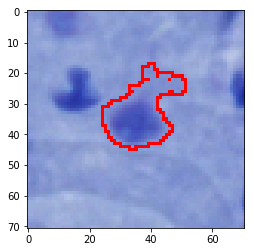

In [122]:
combined=mark_contours(R['mask'],patch)
imshow(combined)

In [123]:
mask=np.zeros([tile.shape[0],tile.shape[1]])

In [124]:
coor=[R['Y'],R['X']]
mask[coor[0]-35:coor[0]+36,coor[1]-35:coor[1]+36]=R['mask']
mask.shape,tile.shape
combined=mark_contours(mask,tile)

((1000, 1000), (1000, 1000, 3))

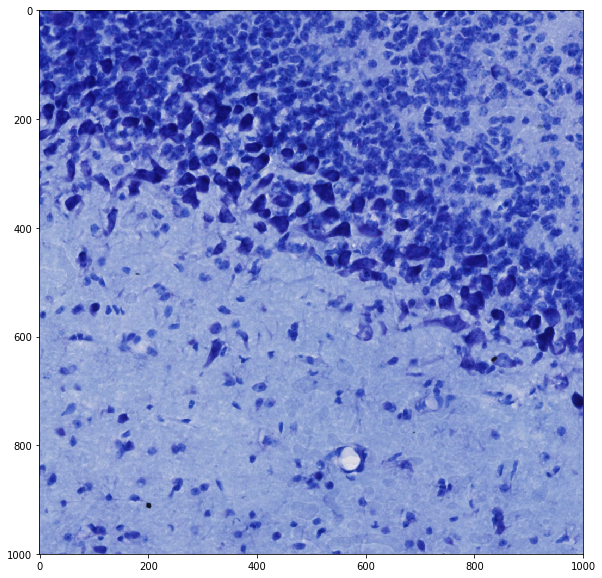

In [208]:
figure(figsize=(10,10))
imshow(tile)

<Figure size 720x720 with 0 Axes>

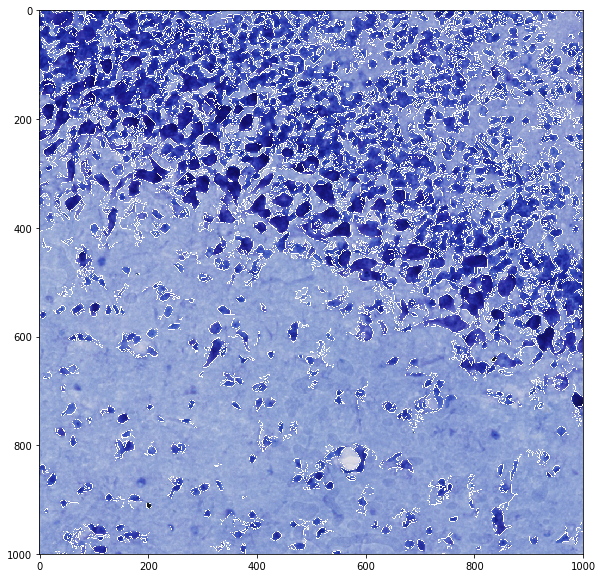

In [226]:
A=cv2.Canny(tile,50,250)
figure(figsize=(10,10))
type(tile[0,0,0])

mask=np.multiply.outer(A,np.array([1,1,1],dtype=np.uint8))
mask.shape

pic=tile.copy()
pic[mask>0]=255
figure(figsize=(10,10))
imshow(pic)